In [30]:
# import cmdstanpy 
# cmdstanpy.install_cmdstan() 
# cmdstanpy.install_cmdstan(compiler=True)

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [31]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

df = pd.read_csv('CR_FC_PREP_0522.csv')
df['POD'] = pd.to_datetime(df['POD'])

df.head()
df.info()
print(f'Dataset size: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB
Dataset size: (6375, 2)


In [32]:
df = df.rename(columns={'POD': 'ds', 'RATE': 'y'})
df.head()

,ds,y
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


In [33]:
m = Prophet(daily_seasonality=True)
m.fit(df)

23:34:42 - cmdstanpy - INFO - Chain [1] start processing
23:34:44 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future = m.make_future_dataframe(periods=52)
future.tail()

,ds
6422,2023-02-17
6423,2023-02-18
6424,2023-02-19
6425,2023-02-20
6426,2023-02-21


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6422,2023-02-17,9293.230161,8243.744056,10393.115772
6423,2023-02-18,9287.019535,8254.292187,10368.943732
6424,2023-02-19,9283.498398,8166.772399,10359.374116
6425,2023-02-20,9278.376111,8250.110449,10350.937814
6426,2023-02-21,9275.769201,8282.648553,10355.080804


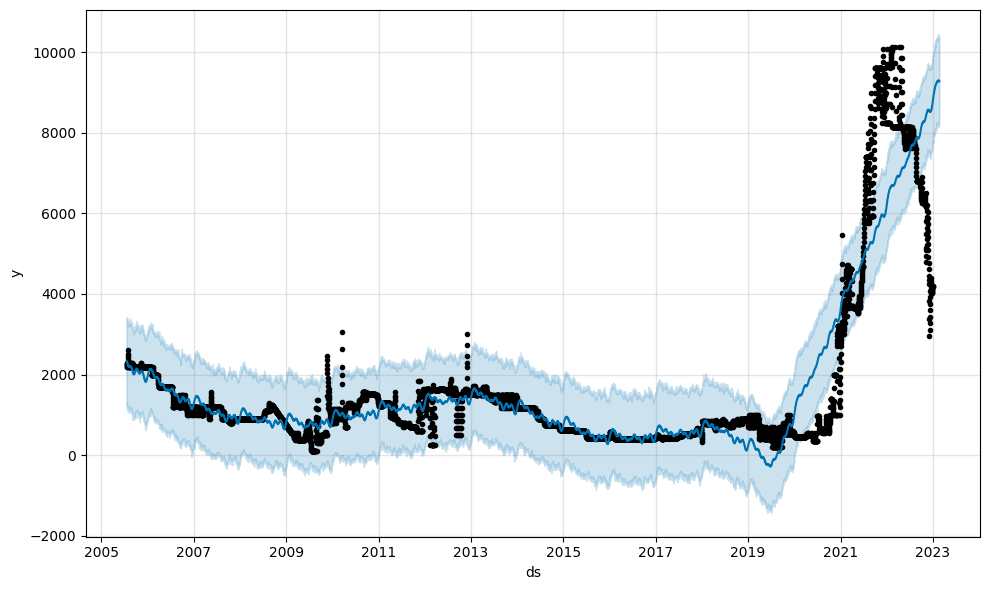

In [36]:
fig1 = m.plot(forecast)

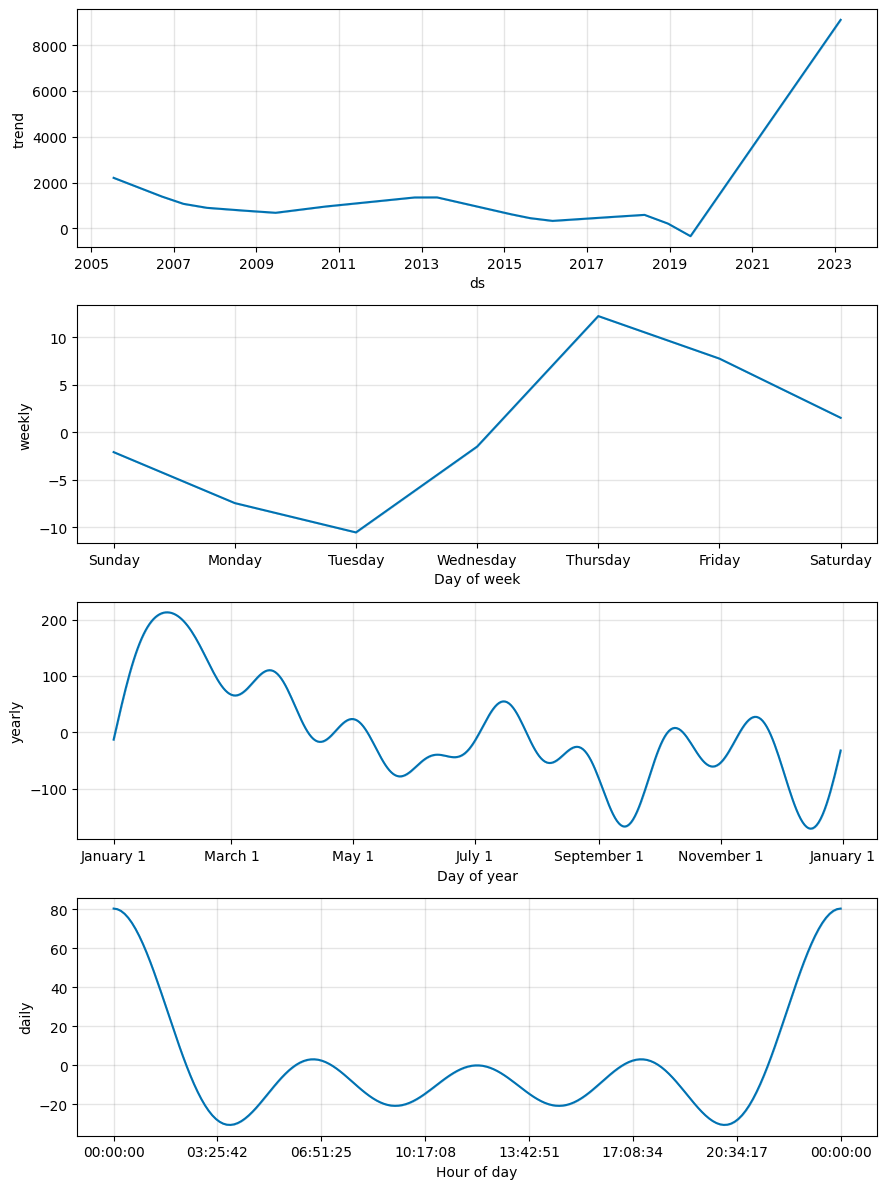

In [37]:
fig2 = m.plot_components(forecast)

In [38]:
plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
plot_components_plotly(m, forecast)